In [9]:
import matplotlib.pyplot as plt
import numpy as np
import string

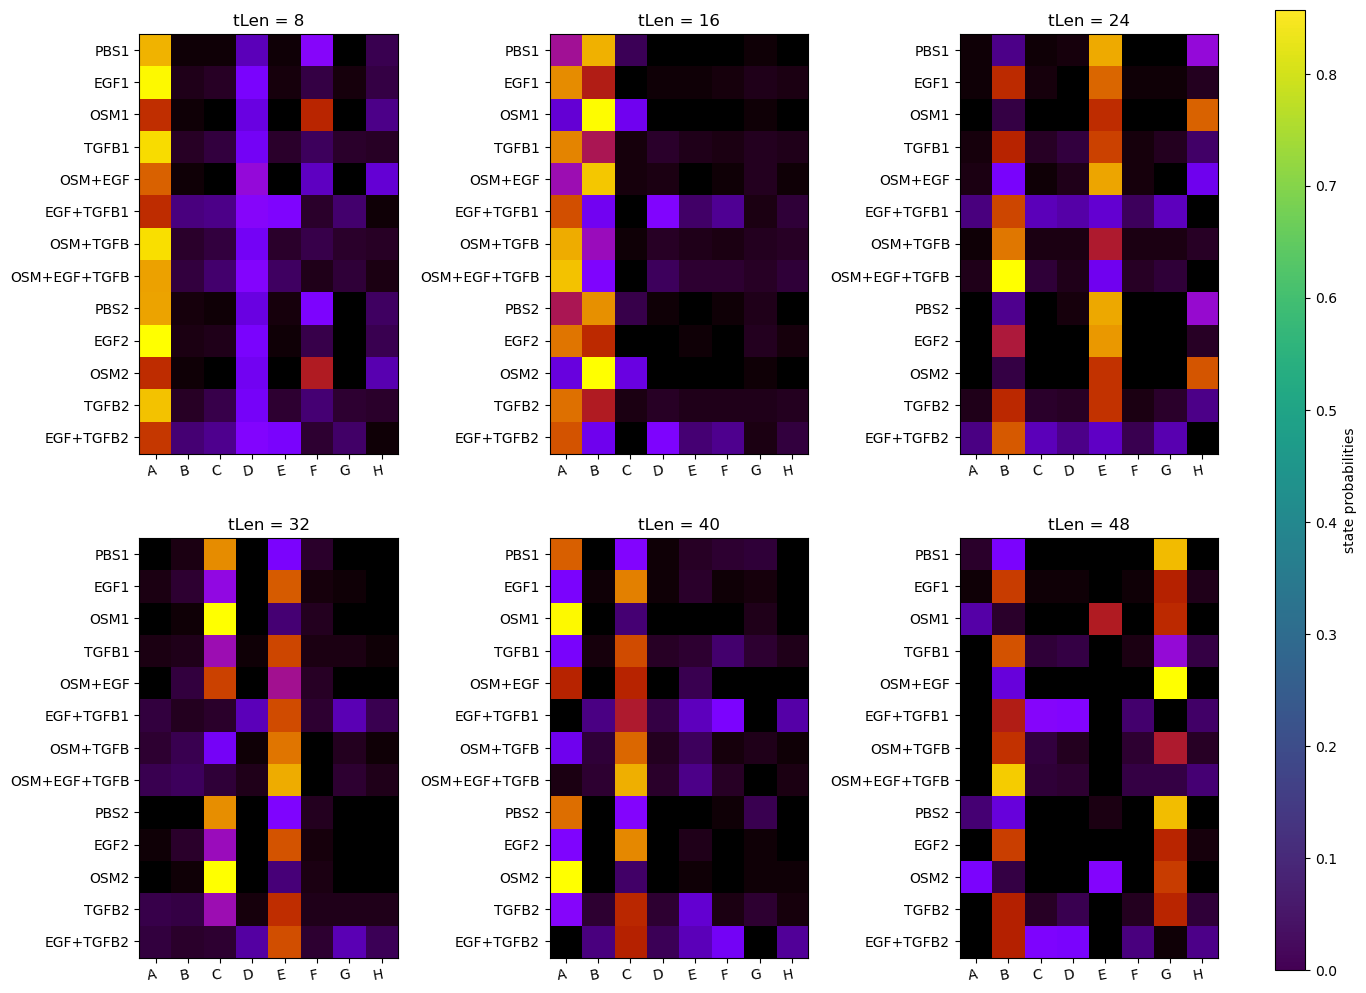

In [17]:
trajectory_lengths = [8, 16, 24, 32, 40, 48]
ntrajLen = len(trajectory_lengths)

fig, ax = plt.subplots(2, 3, figsize = (15, 12))
tmSet = ['PBS1','EGF1','OSM1','TGFB1','OSM+EGF','EGF+TGFB1','OSM+TGFB',
         'OSM+EGF+TGFB','PBS2','EGF2','OSM2','TGFB2','EGF+TGFB2']

for i in range(ntrajLen):
    
    filename = 'stateprobs_LI204601_P_tlen'+str(trajectory_lengths[i])+'_May16-2023_nS_8.dat'
    state_probs = np.loadtxt(filename)
    n_states = state_probs.shape[1]
    state_labels = np.array(list(string.ascii_uppercase))[0:n_states]
    state_order = np.arange(n_states).astype(int)
    
    # Choose the current subplot
    ax_i = ax[i // 3, i % 3]
    
    ax_i.set_title('tLen = '+str(trajectory_lengths[i]))
    ax_i.imshow(state_probs[:, state_order], cmap=plt.cm.gnuplot)
    
    ax_i.set_xticks(np.arange(n_states))
    ax_i.set_xticklabels(np.array(state_labels)[state_order])
    
    ax_i.set_yticks(np.arange(len(tmSet)))
    ax_i.set_yticklabels(tmSet)
   
    # Rotate the tick labels and set their alignment.
    plt.setp(ax_i.get_xticklabels(), rotation=10, ha="right", rotation_mode="anchor")

#adding an axes, lower left corner in [0.91, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8
cb_ax = fig.add_axes([0.91, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax = cb_ax)
cbar.set_label('state probabilities')
#plt.tight_layout()
#plt.show()
plt.savefig('stateprobs_LI204601_P_nS_8'+'.png')